# **ANÁLISIS PREDICTIVO DE CASOS DE COVID-19 BASADO EN CONDICIONES CLIMÁTICAS** 🔎
Maester U. en Big Data y Ciencia de datos

DATOS COVID-19 EN ESPAÑA POR PROVINCIA



*   **Danilo Plazas Irreño**

# INTRODUCCIÓN

La información presentada en este documento es la descripción secuencial de las metodologías implementadas en la base de datos de acceso público sobre el covid-19 en españa.

# CARGUE DE DATOS

Se realizo el cargue del set de datos, los cuales fueron descargados del siguiente link:
https://cnecovid.isciii.es/covid19/#documentaci%C3%B3n-y-datos

Posteriormente asignamos permisos a colab para acceder a nuestro drive en donde se encuentra nuestro dataset y realizamos el cargue de las diferentes librerías necesarias para el análisis y preparación de los datos.



Para un correcto funcionamiento de pandas-profiling se deben instalar las siguientes versiones de librerías:

In [6]:
#pip install pandas-profiling==3.1.0
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --user

SyntaxError: invalid syntax (3682391798.py, line 1)

In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
%matplotlib inline
plt.style.use("ggplot")
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
from pandas_profiling import ProfileReport

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Leemos el archivo CSV

In [3]:

path = os.getcwd()
path = path.replace('\\', '\\\\')
path = path.replace('\\\\', '/')
path = "/".join(path.split("/")[:-1]) + "/Data/Data_Covid/"

In [4]:
# read the data
df_mayor60 = pd.read_csv(path + 'casos_hosp_uci_def_sexo_edad_provres_60_mas.csv', keep_default_na=False, na_values="")
df_todaedad = pd.read_csv(path + 'casos_hosp_uci_def_sexo_edad_provres.csv', keep_default_na=False, na_values="")

Comprobamos los tipos y la cantidad de instacias que tenemos:

In [5]:
print('Nuestro dataset tiene ' + str(df_mayor60.shape[0]) + ' registros y ' + str(df_mayor60.shape[1]) + ' columnas \n')
print(df_mayor60.dtypes)

Nuestro dataset tiene 551889 registros y 8 columnas 

provincia_iso    object
sexo             object
grupo_edad       object
fecha            object
num_casos         int64
num_hosp          int64
num_uci           int64
num_def           int64
dtype: object


In [6]:
print('Nuestro dataset tiene ' + str(df_todaedad.shape[0]) + ' registros y ' + str(df_todaedad.shape[1]) + ' columnas \n')
print(df_todaedad.dtypes)

Nuestro dataset tiene 1299030 registros y 8 columnas 

provincia_iso    object
sexo             object
grupo_edad       object
fecha            object
num_casos         int64
num_hosp          int64
num_uci           int64
num_def           int64
dtype: object


Vemos que ambos conjuntos de datos tiene la misma cantidad de columnas, nombres de columnas y los tipos de datos, es por esta razón que es posile hacer un concat para unir los dos dataframe y realizar una eliminación de duplicados para tener una dataframe unico y realizar el proceos de datacleaning

In [7]:
df = pd.concat([df_mayor60,df_todaedad]).drop_duplicates().reset_index(drop=True)

In [8]:
print('Nuestro dataset tiene ' + str(df.shape[0]) + ' registros y ' + str(df.shape[1]) + ' columnas \n')
print(df.dtypes)

Nuestro dataset tiene 1461210 registros y 8 columnas 

provincia_iso    object
sexo             object
grupo_edad       object
fecha            object
num_casos         int64
num_hosp          int64
num_uci           int64
num_def           int64
dtype: object


Comprobamos de todas las variables, que subconjunto son númericas y la cantidad que tenemos de estas:

In [9]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('Tenemos' + ' ' +str(len(numeric_cols)) + ' columnas de tipo númerico que son: \n')
print(numeric_cols)

Tenemos 4 columnas de tipo númerico que son: 

['num_casos' 'num_hosp' 'num_uci' 'num_def']


Comprobamos de todas las variables, que subconjunto NO son númericas y la cantidad que tenemos de estas:

In [10]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print('Tenemos' + ' ' +str(len(non_numeric_cols)) + ' columnas de tipo NO númerico que son: \n')
print(non_numeric_cols)

Tenemos 4 columnas de tipo NO númerico que son: 

['provincia_iso' 'sexo' 'grupo_edad' 'fecha']


In [11]:
df.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,60-69,2020-01-01,0,0,0,0
1,A,H,70-79,2020-01-01,0,0,0,0
2,A,H,80+,2020-01-01,0,0,0,0
3,A,M,60-69,2020-01-01,0,0,0,0
4,A,M,70-79,2020-01-01,0,0,0,0


Generamos reporte de perfilamiento de datos con el fin de realizar un analisis exploratorio del archivo de entrada que nos permite evaluar el estado de los datos sin ninguna intervención previa. Este archivo .html se genera en la ruta origen del drive en donde se abrio este notebook de colab, de igual forma se adjuntara el archivo en el entregable.

In [10]:
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="df_covid_prof.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 327.14it/s]


El perfilamiento de datos arroja los resultados en el archivo anexo

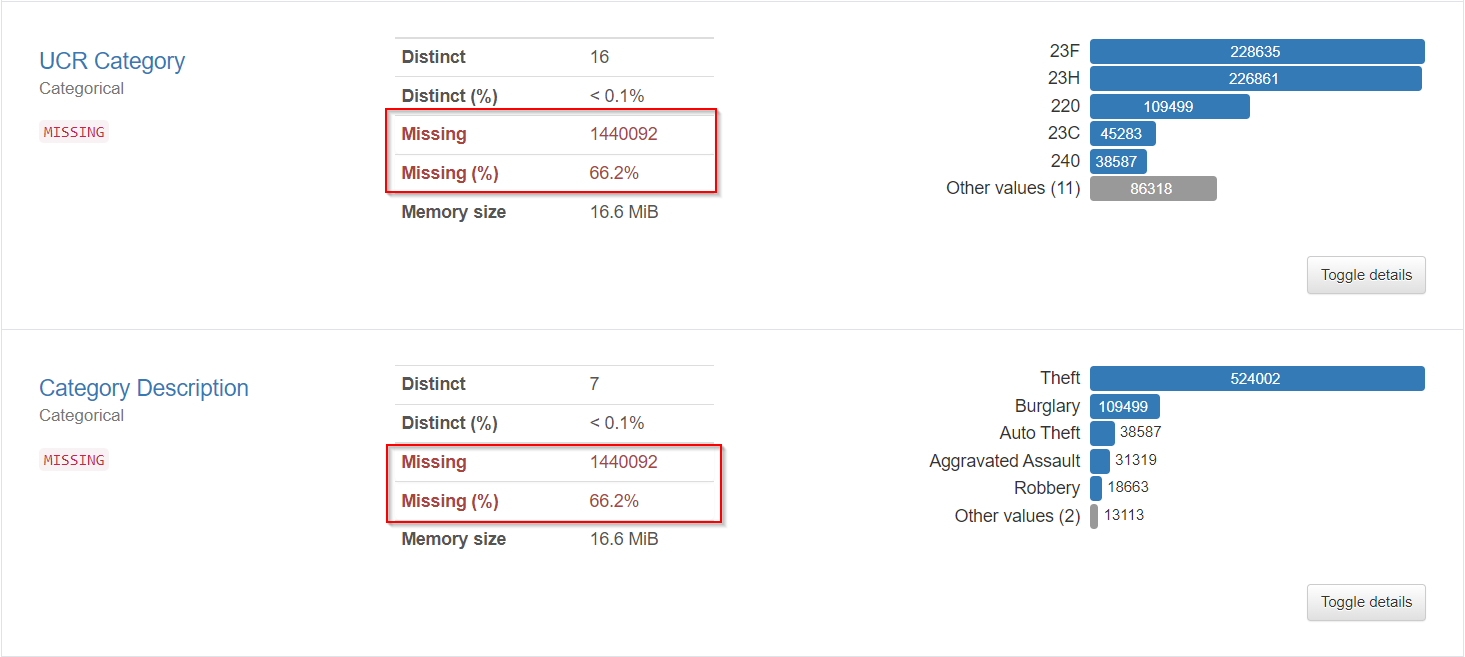

# MISSING VALUES

## Missing Data Heatmap
Podemos visualizar los datos que faltan a través del mapa de calor.

In [12]:
cols = df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22408\1031227828.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


El gráfico anterior muestra los patrones de datos que faltan de todas las columnas. 
El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color amarillo representa los datos que faltan, mientras que el color azul, en caso contrario.
Detallamos que todas las características tienen muy pocos valores perdidos o inclusive no tienen.

## Missing Data Percentage List

A continuación se muestra el listado con el porcentaje de los valores faltantes, para este caso tome 3 decimas ya que hay unos campos que tienen un porcentaje de faltantes muy bajo pero que igual los tiene:

In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 10)))

provincia_iso - 0.0%
sexo - 0.0%
grupo_edad - 0.0%
fecha - 0.0%
num_casos - 0.0%
num_hosp - 0.0%
num_uci - 0.0%
num_def - 0.0%


# ¿Qué hacer?
A continuación se describen en los siguientes métodos más comunes:
Si lo aplicamos, a qué columna se lo aplicamos y el por qué.

##  Dejar o no dejar  la instancia

En esta solución, eliminamos todas la observaciones siempre y cuando contenga un valor faltante.



In [15]:
df['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', 'NA', 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [16]:
# drop rows with a lot of missing values.
df = df[df['provincia_iso'].notna()]

In [17]:
df.shape

(1461210, 8)

## Dejar o no dejar la característica

Similar a la anterior, sólo lo hacemos cuando estamos seguros de que esta característica no proporciona información útil.

No se eliminará ninguna caracteristica ya que tiene su información completa.

A continuación también se evidencia cierta correlación entre las variables descritas anteriormente, teniendo un tono más naranja claro, siendo blanco variables totalmente identicas.

**El siguiente bloque de código solo se ejecuto una vez con fines practicos, ya que transforma las columnas categoricas en un valor numerico correspondiente para realizar la validación de la correlación, y esta columna es importante para el analisis y por el momento necesitamos la descripción**

In [32]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# 
# df['provincia_iso'] = labelencoder.fit_transform(df['provincia_iso'])
# df['sexo'] = labelencoder.fit_transform(df['sexo'])
# df['grupo_edad'] = labelencoder.fit_transform(df['grupo_edad'])
# df['fecha'] = labelencoder.fit_transform(df['fecha'])

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

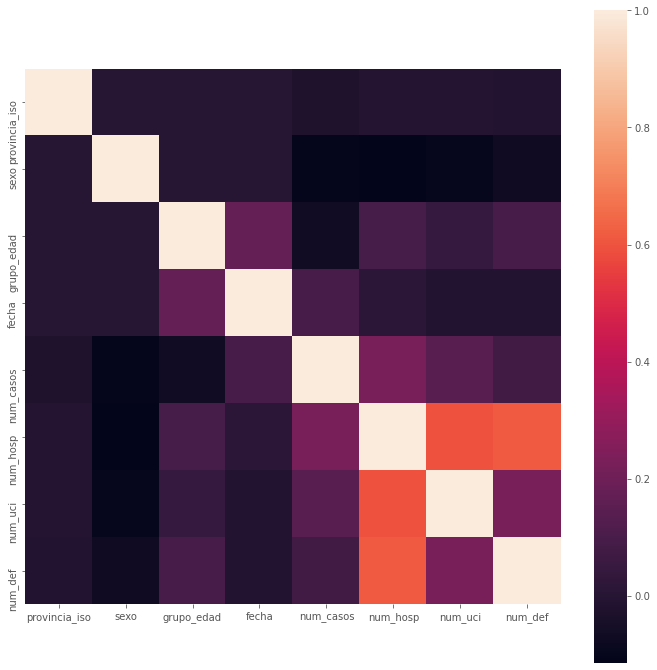

In [33]:
corr = df.corr(method = "pearson")
%pylab inline
pyplot.figure(figsize=(12,12))
sns.heatmap(corr, square = True, xticklabels=1, yticklabels=1)

Procedemos a eliminar las variables UCR Category y Category Description por la razones expuestas anteriormente:

# TRANSFORMACION NOMBRE DE COLUMNAS

Se renombramos las columnas para dar un estandar de nombramiento y facilitar el manejo.

In [18]:
df.columns = ['PROVINCIA_ISO','SEXO','GRUPO_EDAD','FECHA','NUM_CASOS','NUM_HOSP','NUM_UCI','NUM_DEFU']

# REEMPLAZAR VALORES

In [19]:
df['PROVINCIA_ISO'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', 'NA', 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [22]:
df['SEXO'].unique()

array(['H', 'M', 'NC'], dtype=object)

In [23]:
df['GRUPO_EDAD'].unique()

array(['60-69', '70-79', '80+', '0-9', '10-19', '20-29', '30-39', '40-49',
       '50-59', 'NC'], dtype=object)

In [24]:
df[df['GRUPO_EDAD']== "NC"]

,PROVINCIA_ISO,SEXO,GRUPO_EDAD,FECHA,NUM_CASOS,NUM_HOSP,NUM_UCI,NUM_DEFU
551895,A,H,NC,2020-01-01,0,0,0,0
551902,A,M,NC,2020-01-01,0,0,0,0
551909,A,NC,NC,2020-01-01,0,0,0,0
551916,AB,H,NC,2020-01-01,0,0,0,0
551923,AB,M,NC,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
1461181,Z,M,NC,2022-03-27,0,0,0,0
1461188,Z,NC,NC,2022-03-27,0,0,0,0
1461195,ZA,H,NC,2022-03-27,0,0,0,0
1461202,ZA,M,NC,2022-03-27,0,0,0,0


**Realizando nuevamente el porcentaje de valores faltantes de todas las variables se obtiene:**

In [25]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 7)))

PROVINCIA_ISO - 0.0%
SEXO - 0.0%
GRUPO_EDAD - 0.0%
FECHA - 0.0%
NUM_CASOS - 0.0%
NUM_HOSP - 0.0%
NUM_UCI - 0.0%
NUM_DEFU - 0.0%


# TRANSFORMACION TIPOS DE DATOS

Realizaremos las siguientes transformaciónes en los datos:
- Convertimos las variables de tiempo a tipo "datetime"
- Las variables que estén tipo float y no tengan ningun valor decimal se convertiran en enteros.
- Normalización y homologación de los valores en campos categoricos con el fin de agrupar y estandarizar.

In [26]:
df["FECHA"] = pd.to_datetime(df["FECHA"])

In [27]:
print(df.dtypes)

PROVINCIA_ISO            object
SEXO                     object
GRUPO_EDAD               object
FECHA            datetime64[ns]
NUM_CASOS                 int64
NUM_HOSP                  int64
NUM_UCI                   int64
NUM_DEFU                  int64
dtype: object


In [28]:
df

,PROVINCIA_ISO,SEXO,GRUPO_EDAD,FECHA,NUM_CASOS,NUM_HOSP,NUM_UCI,NUM_DEFU
0,A,H,60-69,2020-01-01,0,0,0,0
1,A,H,70-79,2020-01-01,0,0,0,0
2,A,H,80+,2020-01-01,0,0,0,0
3,A,M,60-69,2020-01-01,0,0,0,0
4,A,M,70-79,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
1461205,ZA,NC,20-29,2022-03-27,0,0,0,0
1461206,ZA,NC,30-39,2022-03-27,0,0,0,0
1461207,ZA,NC,40-49,2022-03-27,0,0,0,0
1461208,ZA,NC,50-59,2022-03-27,0,0,0,0


# OUTLIERS (DATOS FUERA DE RANGO)

- A continuación mediante un histograma, se evidencia que con respecto a las **fechas** no existe outliers ya que los datos deben corresponder desde el 2020 hasta la actualidad.

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot: >

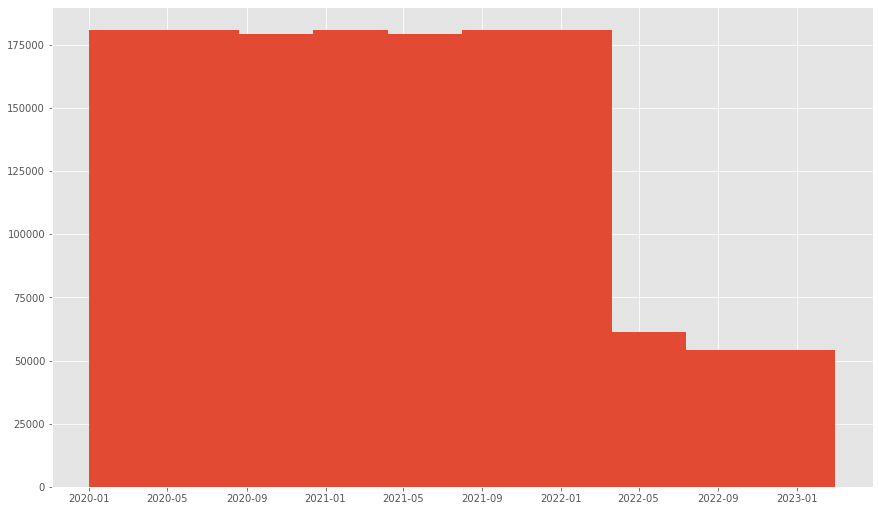

In [29]:
%pylab inline
plt.figure(figsize=(50, 30))

ax1 = plt.subplot(331)
df['FECHA'].hist(bins=10)

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot: >

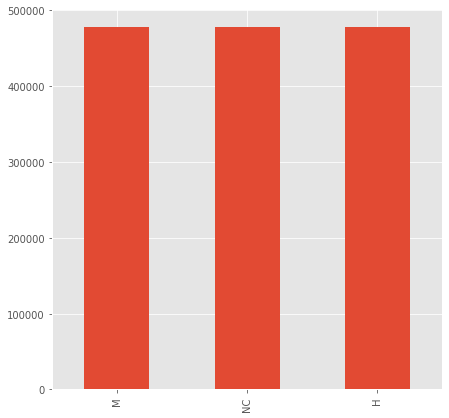

In [30]:
%pylab inline
pyplot.figure(figsize=(7,7))
df['SEXO'].value_counts().plot.bar()

<AxesSubplot: >

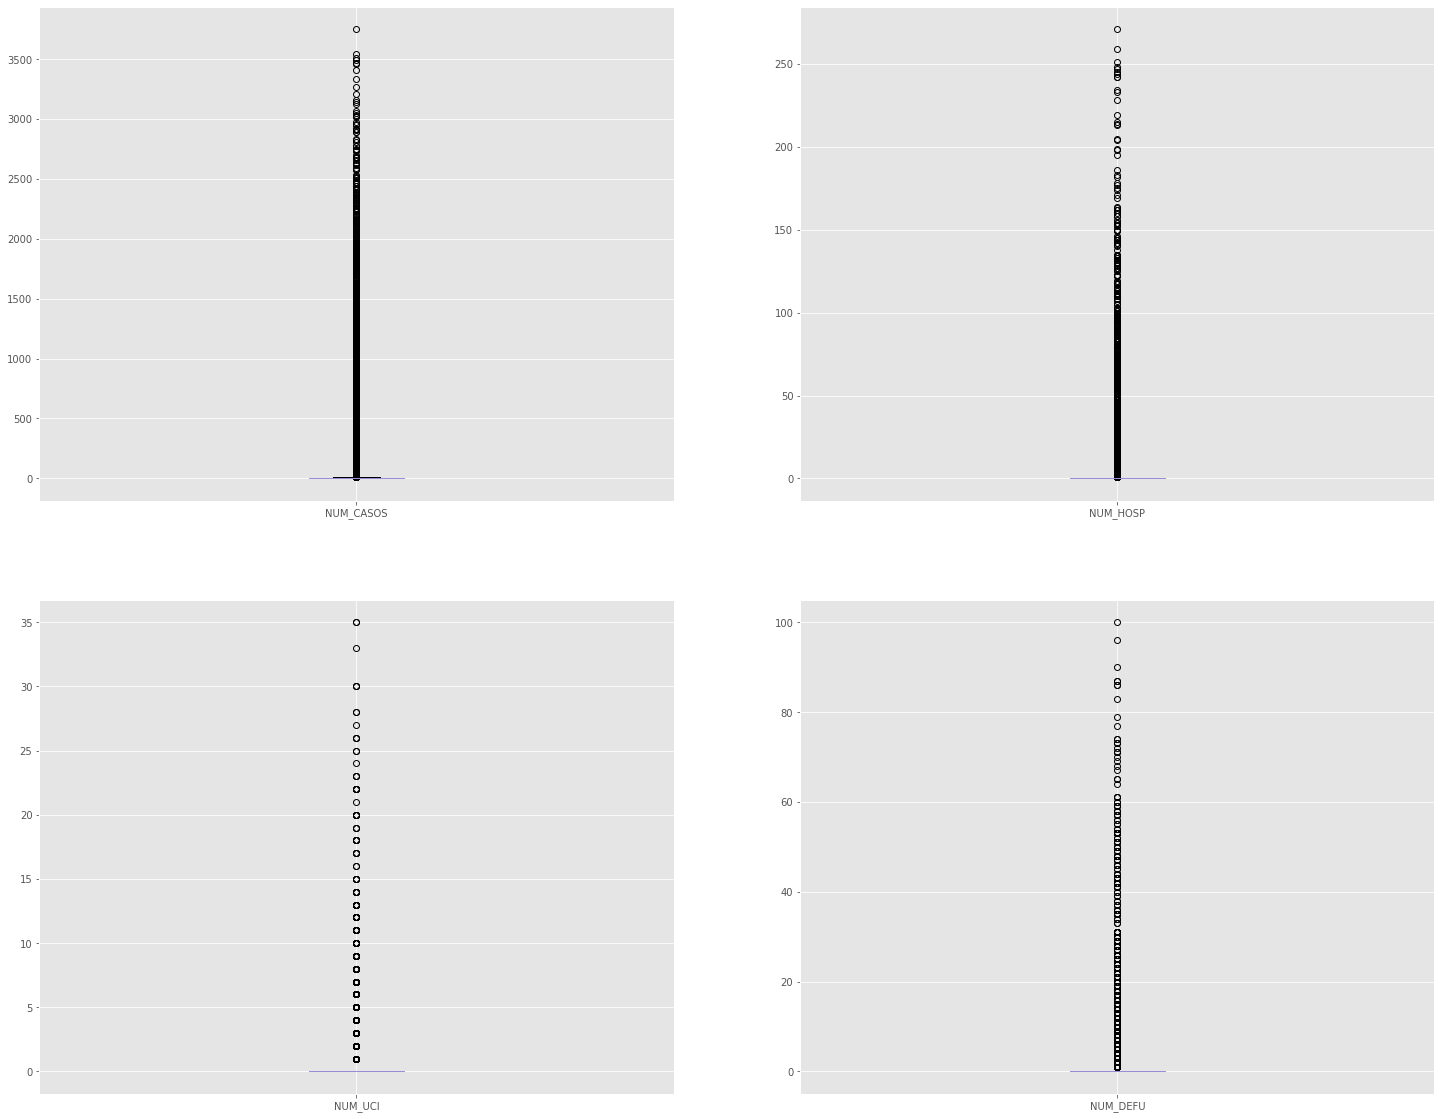

In [32]:
plt.figure(figsize=(25, 20))

axa = plt.subplot(221)
df.boxplot(column=['NUM_CASOS'])

axb = plt.subplot(222)
df.boxplot(column=['NUM_HOSP'])

axc = plt.subplot(223)
df.boxplot(column=['NUM_UCI'])

axd = plt.subplot(224)
df.boxplot(column=['NUM_DEFU'])

# DATOS INNECESARIOS


## Tipo: Desinformativo / Repetitivo

Las siguientes variable **NUM_CASOS**, **NUM_HOSP**, **NUM_UCI**, **NUM_DEFU** tienen un campo con más del 50% de los datos, no la eliminaremos, ya que es de esperarse que sean muchisimo menor la cantidad de contagios tendiendo a cero. Se concluye que todas las demás variables tiene una buena distribución de los datos. 

In [33]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.5:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

NUM_CASOS: 57.05038%
0       817897
1       103592
2        70791
3        53503
4        42473
         ...  
1557         1
1549         1
2572         1
1547         1
2487         1
Name: NUM_CASOS, Length: 1417, dtype: int64

NUM_HOSP: 84.31531%
0      1208778
1       120294
2        44241
3        21273
4        11395
        ...   
163          1
164          1
169          1
171          1
271          1
Name: NUM_HOSP, Length: 175, dtype: int64

NUM_UCI: 97.28886%
0     1394772
1       31413
2        4835
3        1336
4         533
5         288
6         137
7          97
8          58
9          37
11         28
10         18
13         15
12         15
14          7
18          6
20          6
22          6
15          5
17          4
19          3
23          3
26          3
30          3
16          2
25          2
28          2
35          2
33          1
21          1
24          1
27          1
Name: NUM_UCI, dtype: int64

NUM_DEFU: 95.84589%
0      1374085
1        4

## Tipo: Duplicados

No existen registros duplicados ya que se eliminaron al comienzo cuando se creo el dataframe.

# DATOS INCONSISTENTES

## Capitalization

Para evitar que existan palabras distintas y que simbolicen el mismo significado solo por el hecho de estar en minuscula o mayusculas, para todas las variables tipo string las pasaremos a mayuscula, ya que por defecto todas viene así, también elimnaremos los espacios al principio y al final.

In [34]:
col_str = ['PROVINCIA_ISO', 'SEXO', 'GRUPO_EDAD']
for x in col_str:
  df[x] = df[x].str.upper()
  df[x] = df[x].str.strip()

In [ ]:
df

# **CONCLUSIÓN** ✅




Tras realizar todos los pasos, pruebas de exploración, tratamiento y limpieza de datos en comparación con el set de datos inicial, los datos se ven de la siguiente forma:

In [35]:
df.head(5)

,PROVINCIA_ISO,SEXO,GRUPO_EDAD,FECHA,NUM_CASOS,NUM_HOSP,NUM_UCI,NUM_DEFU
0,A,H,60-69,2020-01-01,0,0,0,0
1,A,H,70-79,2020-01-01,0,0,0,0
2,A,H,80+,2020-01-01,0,0,0,0
3,A,M,60-69,2020-01-01,0,0,0,0
4,A,M,70-79,2020-01-01,0,0,0,0


In [36]:
df.shape

(1433640, 8)

Se paso de: 

**1461210** registros y **8** columnas 

a:

 **1433640** registros y **8** columnas

Este valor es el resultado de la eliminación de valores atipicos, duplicados, nulos, etc.

Se exporta el dataframe final a un archivo parquet el cual es comprimido, y la lectura es mucho más rápida, esto se hace con el fin de al momento de empezar con nuestro analisis o modelos, tengamos como punto de partida este archivo de salida totalmente limpio, a continuación la exportación final:   

In [ ]:
#df.to_parquet(path = 'DF_COVID', engine = 'auto', compression ='snappy', index=None)

In [ ]:
df.to_csv('data_covid.csv', index=False)

Se realiza un perfilamiento por medio de pandas-profiling de este archivo para su comparación con el generado inicialmente, también se añade a la entrega.
El perfilamiento no se hace en este notebook ya que por temas de memoría utilizado a lo largo de todo el proceso el google colab casi llega a su limite, pero el proceso es exactamente el mismo del comienzo:

In [ ]:
#parquet_crime = pd.read_parquet(path = '/content/drive/My Drive/Colab Notebooks/VIU/05MBID_Mineria_Datos/DF_CRIME_PARQUET', engine = 'auto')

In [ ]:
#profilefinal = ProfileReport(parquet_crime, minimal=True)
#profilefinal.to_file(output_file="crime_profile_final.html")

# **FIN** 🙂